# Contents
## 01. Import Libraries and Data
## 02. Data Prep
## 03. Elbow Technique
## 04. K-Means Clustering

# 01. Import Libraries and Data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [14]:
%matplotlib inline

In [15]:
# Assign path to str
path = r'/Users/allyfornino/Documents/11-2022 Gun Violence Analysis/'

In [16]:
# Import clean data as df
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_gun_violence_data.csv'))

In [17]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,...,teen_participant,adult_participant,all_adults,all_female_participants,all_male_participants,mixed_gender_participants,all_victims,all_suspects,suspects_and_victims,n_participants
0,32,481229,2013-03-07,Mississippi,Jackson,2,2,32.2649,-90.2141,1.0,...,False,True,True,False,False,True,False,False,True,4
1,56,485746,2013-04-22,Louisiana,Harvey,0,5,29.8736,-90.0568,3.0,...,False,True,NaN,False,False,True,False,False,True,9
2,62,485979,2013-04-28,Tennessee,Jackson,2,2,35.6141,-88.8150,2.0,...,False,True,True,False,True,False,False,False,True,6
3,78,873575,2013-05-18,New York,Jamaica,1,0,40.6730,-73.7881,1.0,...,True,True,NaN,False,False,True,False,False,True,2
4,79,486611,2013-05-18,Virginia,Victoria,0,4,37.0177,-78.1562,1.0,...,False,True,True,False,True,False,False,False,True,5


# 02. Data Prep

In [18]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,stolen_gun_involved,...,teen_participant,adult_participant,all_adults,all_female_participants,all_male_participants,mixed_gender_participants,all_victims,all_suspects,suspects_and_victims,n_participants
0,481229,2013-03-07,Mississippi,Jackson,2,2,32.2649,-90.2141,1.0,Unknown,...,False,True,True,False,False,True,False,False,True,4
1,485746,2013-04-22,Louisiana,Harvey,0,5,29.8736,-90.0568,3.0,Unknown,...,False,True,NaN,False,False,True,False,False,True,9
2,485979,2013-04-28,Tennessee,Jackson,2,2,35.6141,-88.8150,2.0,Unknown,...,False,True,True,False,True,False,False,False,True,6
3,873575,2013-05-18,New York,Jamaica,1,0,40.6730,-73.7881,1.0,Unknown,...,True,True,NaN,False,False,True,False,False,True,2
4,486611,2013-05-18,Virginia,Victoria,0,4,37.0177,-78.1562,1.0,Unknown,...,False,True,True,False,True,False,False,False,True,5


In [19]:
df['mass_shooting_flag'].value_counts()

False    4641
True       80
Name: mass_shooting_flag, dtype: int64

In [38]:
df_sub = df[['incident_id', 'n_killed', 'n_injured', 'n_participants']]
df_sub.head()

,incident_id,n_killed,n_injured,n_participants
0,481229,2,2,4
1,485746,0,5,9
2,485979,2,2,6
3,873575,1,0,2
4,486611,0,4,5


In [20]:
state_incidents = pd.pivot_table(df, index = 'state', values = ['n_injured', 'n_killed', 'n_guns_involved', 'n_participants', 'mass_shooting_flag', 'drive_by_flag', 'domestic_violence_flag', 'armed_robbery_flag', 'gang_involvement_flag', 'accidental_flag', 'self_inflicted_flag'], aggfunc = 'sum')
state_incidents

,accidental_flag,armed_robbery_flag,domestic_violence_flag,drive_by_flag,gang_involvement_flag,mass_shooting_flag,n_guns_involved,n_injured,n_killed,n_participants,self_inflicted_flag
state,,,,,,,,,,,
Alabama,2,3,1,0,0,0,24.0,10,8,23,1
Alaska,0,0,1,4,0,0,24.0,3,5,14,0
Arizona,7,2,6,5,2,0,53.0,23,28,61,2
Arkansas,4,4,4,1,1,1,53.0,46,9,69,0
California,19,17,12,21,34,4,291.0,96,83,226,6
Colorado,6,2,4,6,3,0,55.0,19,11,32,2
Connecticut,6,10,4,5,5,2,123.0,52,22,107,2
Delaware,1,4,2,1,0,0,66.0,35,14,72,0
District of Columbia,1,0,0,0,0,0,6.0,5,1,7,0


In [21]:
df_state = pd.DataFrame(state_incidents)
df_state.head()

,accidental_flag,armed_robbery_flag,domestic_violence_flag,drive_by_flag,gang_involvement_flag,mass_shooting_flag,n_guns_involved,n_injured,n_killed,n_participants,self_inflicted_flag
state,,,,,,,,,,,
Alabama,2,3,1,0,0,0,24.0,10,8,23,1
Alaska,0,0,1,4,0,0,24.0,3,5,14,0
Arizona,7,2,6,5,2,0,53.0,23,28,61,2
Arkansas,4,4,4,1,1,1,53.0,46,9,69,0
California,19,17,12,21,34,4,291.0,96,83,226,6


In [22]:
df_state.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'state_incidents.csv'))

In [23]:
df_state.corr()

,accidental_flag,armed_robbery_flag,domestic_violence_flag,drive_by_flag,gang_involvement_flag,mass_shooting_flag,n_guns_involved,n_injured,n_killed,n_participants,self_inflicted_flag
accidental_flag,1.000000,0.859304,0.819594,0.794295,0.495105,0.693083,0.928922,0.901135,0.875648,0.921397,0.804964
armed_robbery_flag,0.859304,1.000000,0.885297,0.743783,0.335915,0.718178,0.929819,0.847391,0.929837,0.939113,0.625606
domestic_violence_flag,0.819594,0.885297,1.000000,0.710745,0.237756,0.596075,0.875458,0.783233,0.902450,0.867404,0.587195
drive_by_flag,0.794295,0.743783,0.710745,1.000000,0.652681,0.713063,0.850507,0.810471,0.774392,0.826317,0.686676
gang_involvement_flag,0.495105,0.335915,0.237756,0.652681,1.000000,0.559412,0.509281,0.619430,0.367275,0.476767,0.521598
mass_shooting_flag,0.693083,0.718178,0.596075,0.713063,0.559412,1.000000,0.763597,0.827471,0.725851,0.812292,0.552464
n_guns_involved,0.928922,0.929819,0.875458,0.850507,0.509281,0.763597,1.000000,0.937393,0.937006,0.980522,0.759076
n_injured,0.901135,0.847391,0.783233,0.810471,0.619430,0.827471,0.937393,1.000000,0.840639,0.953002,0.745135
n_killed,0.875648,0.929837,0.902450,0.774392,0.367275,0.725851,0.937006,0.840639,1.000000,0.940563,0.677035
n_participants,0.921397,0.939113,0.867404,0.826317,0.476767,0.812292,0.980522,0.953002,0.940563,1.000000,0.731577


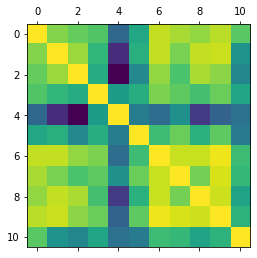

In [24]:
plt.matshow(df_state.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

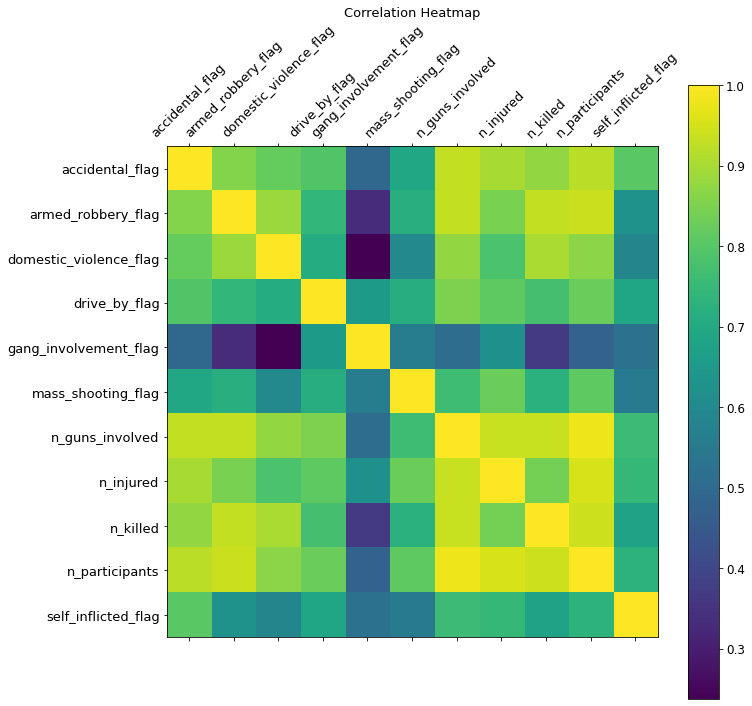

In [25]:
# Make figure larger
f = plt.figure(figsize = (11, 11))
# Add labels and a legend
plt.matshow(df_state.corr(), fignum = f.number)
plt.xticks(range(df_state.shape[1]), df_state.columns, fontsize = 13, rotation = 45)
plt.yticks(range(df_state.shape[1]), df_state.columns, fontsize = 13)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 12)
plt.title('Correlation Heatmap', fontsize = 13)

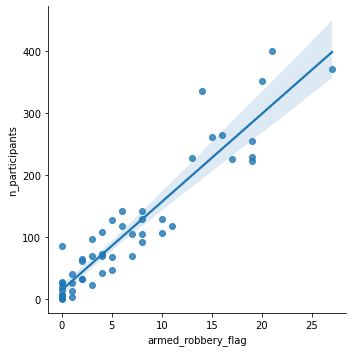

In [26]:
sns.lmplot(x = 'armed_robbery_flag', y = 'n_participants', data = df_state)

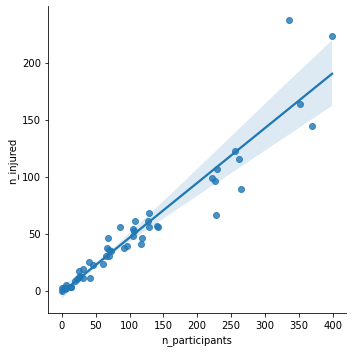

In [27]:
sns.lmplot(x = 'n_participants', y = 'n_injured', data = df_state)

# 03. Elbow Technique

In [28]:
# Defining range of potential clusters
num_cl = range(1, 10)

In [29]:
# Defining k-means clusters in range num_cl
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [30]:
# Create a score that represents a rate of variation for cluster
score = [kmeans[i].fit(df_state).score(df_state) for i in range(len(kmeans))]
score

[-1418840.7450980395,
 -358072.92272727273,
 -209866.0852272727,
 -105219.3125,
 -77867.57142857143,
 -60251.57142857143,
 -43672.07142857143,
 -36059.37142857143,
 -30133.490476190476]

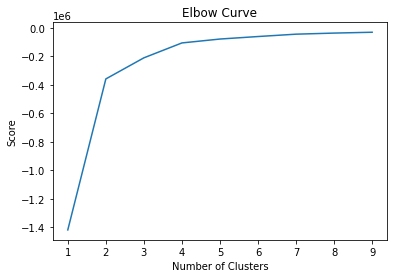

In [31]:
# Plot elbow curve
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal count for clusters is four as the curve straightens out afterwards.

# 04. K-Means Clustering

In [32]:
# Create k-means object with four clusters
kmeans = KMeans(n_clusters = 4)

In [33]:
# Fit k-means object to df
kmeans.fit(df_state)

KMeans(n_clusters=4)

In [39]:
kmeans.fit(df_sub)

KMeans(n_clusters=4)

In [34]:
df_state['clusters'] = kmeans.fit_predict(df_state)

In [40]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

/var/folders/k5/h7hd9lyd3_71d0dxdtly8w4r0000gn/T/ipykernel_7995/4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [35]:
df_state['clusters'].value_counts()

1    24
0    16
2     8
3     3
Name: clusters, dtype: int64

In [41]:
df_sub['clusters'].value_counts()

2    1428
1    1347
3    1154
0     792
Name: clusters, dtype: int64

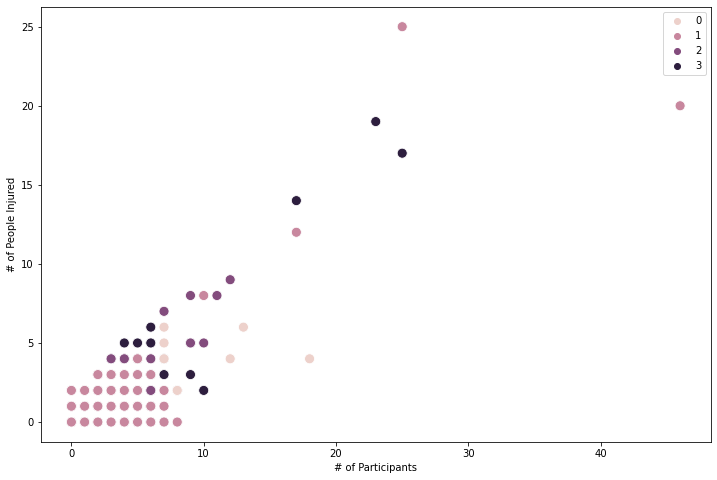

In [42]:
# Plot the clusters for the 'n_participants' and 'n_injured' variables
plt.figure(figsize = (12,8))
k = sns.scatterplot(x = df_sub['n_participants'], y = df_sub['n_injured'], hue = kmeans.labels_, s = 100)
k.grid(False)
plt.xlabel('# of Participants')
plt.ylabel('# of People Injured')
plt.show()

In [45]:
df_sub.to_excel(os.path.join(path, '04 Analysis', 'Cluster_Data.xlsx'), sheet_name='Sheet1', index = False)

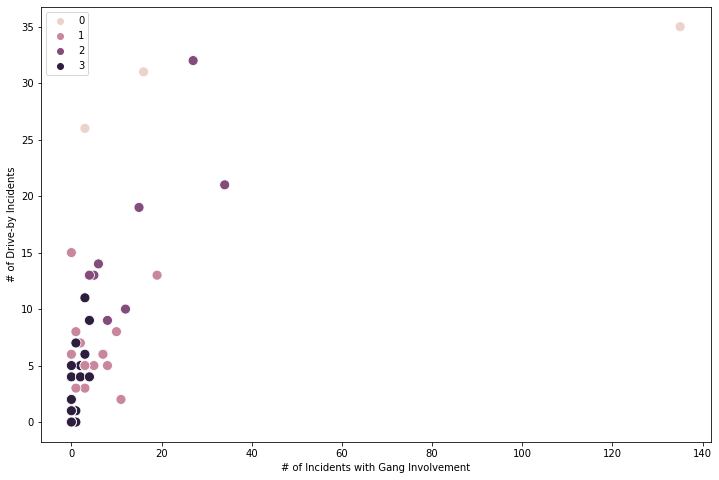

In [71]:
# Plot the clusters for the 'gang_involvement_flag' and 'drive_by_flag' variables
plt.figure(figsize = (12,8))
k = sns.scatterplot(x = df_state['gang_involvement_flag'], y = df_state['drive_by_flag'], hue = kmeans.labels_, s = 100)
k.grid(False)
plt.xlabel('# of Incidents with Gang Involvement')
plt.ylabel('# of Drive-by Incidents')
plt.show()

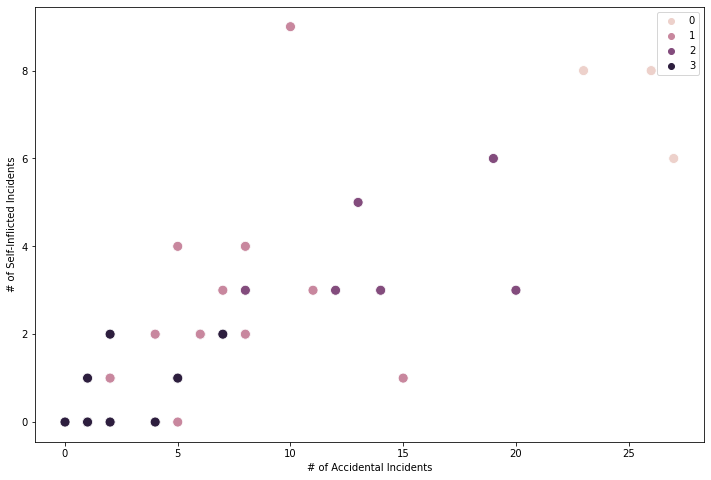

In [73]:
# Plot the clusters for the 'accidental_flag' and 'self_inflicted_flag' variables
plt.figure(figsize = (12,8))
k = sns.scatterplot(x = df_state['accidental_flag'], y = df_state['self_inflicted_flag'], hue = kmeans.labels_, s = 100)
k.grid(False)
plt.xlabel('# of Accidental Incidents')
plt.ylabel('# of Self-Inflicted Incidents')
plt.show()

In [67]:
df_state.loc[df_state['clusters'] == 2, 'cluster'] = 'dark purple'
df_state.loc[df_state['clusters'] == 1, 'cluster'] = 'purple'
df_state.loc[df_state['clusters'] == 0, 'cluster'] = 'pink'

In [74]:
df_state.groupby('cluster').agg({'gang_involvement_flag':['mean', 'median'],
                                'drive_by_flag':['mean', 'median'],
                                'accidental_flag':['mean', 'median'],
                                'self_inflicted_flag':['mean', 'median']})

gang_involvement_flag        drive_by_flag        accidental_flag  \
                             mean median          mean median            mean   
cluster                                                                         
dark purple             13.875000   10.0     16.375000   13.5       13.500000   
pink                    51.333333   16.0     30.666667   31.0       25.333333   
purple                   5.125000    3.0      6.312500    5.5        6.687500   

                   self_inflicted_flag         
            median                mean median  
cluster                                        
dark purple   13.5            3.500000    3.0  
pink          26.0            7.333333    8.0  
purple         6.5            2.625000    2.0

#### Both clusters of states have an interesting, overlapping grouping. The first cluster has almost a logarithmic shape, with drive-by incidents increasing much more than gang-related incidents initially before tapering off. Further analysis may reveal more about this possible relationship.
#### The second cluster has a very weak linear shape; in general, states with more accidental incidents also have more self-inflicted ones. This makes sense as many self-inflicted incidents (which do not include suicide or suicide attempts) also qualify as accidental shootings under GVA's methodology.
#### These results can be combined with time-series analysis and used to compare states with high frequencies of incidents and states with lower frequences to identify warning signs of increased gun violence. The states can also be separated into different groups to see if there are any common attributes between those with similar numbers of incidents (e.g. similar laws regarding firearm possession or lack thereof). 